In [100]:
from haversine import haversine, Unit
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import csv
import pandas as pd
import geopandas as gpd
import fiona
import os
import pprint

%matplotlib inline

In [86]:
df = pd.read_csv('population_AS47_2018-10-01.csv')
#df =  df.iloc[100000:]

In [67]:
india_shp = gpd.read_file("shapefiles/India_Districts_ADM2_GADM.shp")

In [87]:
haversine(p1, p2, unit='in')

1111.7194568193104

In [68]:
# find avg distance between consecutive points
sum_dist = 0
prev_pt = p1
n = 10
for i in range(1, n):
    pt = (df['latitude'][i], df['longitude'][i])
    dist =  haversine(prev_pt, pt, unit='in') / 12
    print(dist, " ft")
    sum_dist += dist
    prev_pt = pt
print("avg_dist in feet: ", sum_dist/(n-1))

92.64328806827587  ft
648.5030164941401  ft
92.64328808100504  ft
185.28657614070536  ft
1024.101165231262  ft
741.1447118046348  ft
92.64308898659532  ft
277.92926692972696  ft
211.18732122708354  ft
avg_dist in feet:  374.00908032926986


<AxesSubplot:>

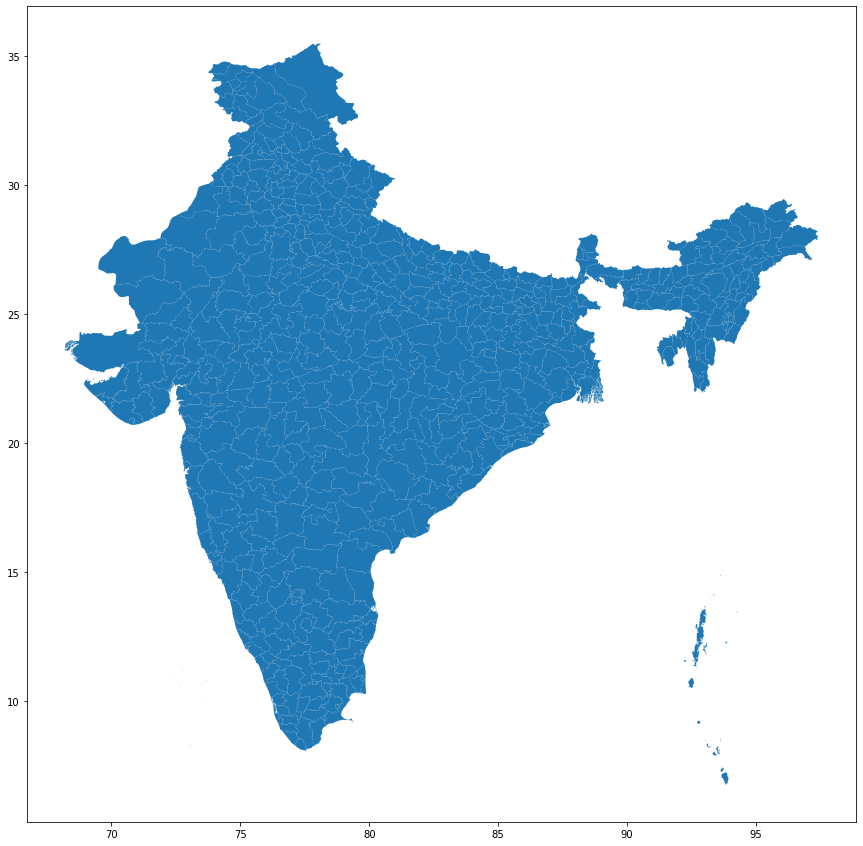

In [73]:
# display shapefile
fig, ax = plt.subplots(figsize=(15,15))
india_shp.plot(ax = ax)

In [76]:
crs = {'init': 'epsg:4326'} # coordinate reference system (long, lat)
df.head()

,latitude,longitude,population_2015,population_2020
0,23.90625,67.717917,13.270396,14.558465
1,23.90625,67.718194,13.270396,14.558465
2,23.90625,67.720139,13.270396,14.558465
3,23.90625,67.720417,13.270396,14.558465
4,23.90625,67.720972,13.270396,14.558465


In [77]:
# converting lat and long in df to coordinate shapely Points 
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [78]:
geo_df = gpd.GeoDataFrame(df, #dataset
                          crs=crs, #coordinate system
                          geometry=geometry) # specify geometry list
geo_df.head()

,latitude,longitude,population_2015,population_2020,geometry
0,23.90625,67.717917,13.270396,14.558465,POINT (67.71792 23.90625)
1,23.90625,67.718194,13.270396,14.558465,POINT (67.71819 23.90625)
2,23.90625,67.720139,13.270396,14.558465,POINT (67.72014 23.90625)
3,23.90625,67.720417,13.270396,14.558465,POINT (67.72042 23.90625)
4,23.90625,67.720972,13.270396,14.558465,POINT (67.72097 23.90625)


In [81]:
# plot just a sliver of 18million points
lil_geo_df = geo_df.iloc[10000:30000]

<AxesSubplot:>

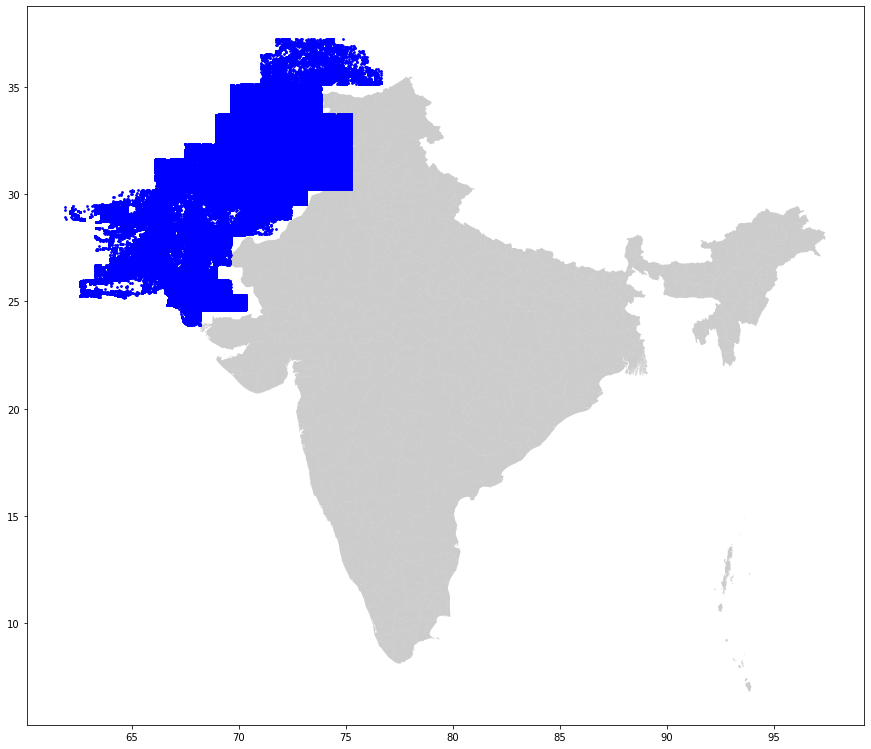

In [84]:
fig, ax = plt.subplots(figsize=(15,15))
india_shp.plot(ax = ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, markersize=3, color='blue')

In [135]:
def shp_lookup(shp_dir, search_prop, query):
    """
    function that returns name of shapefile (.shp) associated with a particualar field
    If looking for shp by city, use

    Args:
        shp_dir : str
            location of shapefiles to be searched
        
        search_prop : str
            field to search for in shapefiles
            (city: 'NAME_2')
            (region/state: 'NAME_1')
        
        query : str
            string to be searched for i.e. 'Delhi'

    Returns:
        str : filename of shapefile or None
    """
    for filename in os.listdir(shp_dir):
        if filename.endswith(".shp"):
            with fiona.open(shp_dir + filename) as src:
                if src[0]['properties'][search_prop] == query:
                    return filename
    return "None"

In [138]:
shp_lookup(r'shapefiles/regions/', 'NAME_2', 'Delhi')

'NAME_2_145.shp'